# Finding the best chocolate bars

Now let's now move on to the competition and challenge.

## 📖 Background
You work at a specialty foods import company that wants to expand into gourmet chocolate bars. Your boss needs your team to research this market to inform your initial approach to potential suppliers.

After finding valuable chocolate bar ratings online, you need to explore if the chocolate bars with the highest ratings share any characteristics that could help you narrow your search for suppliers (e.g., cacao percentage, bean country of origin, etc.)

## 💾 The data

#### Your team created a file with the following information ([source](https://flavorsofcacao.com)):
- "id" - id number of the review
- "manufacturer" - Name of the bar manufacturer
- "company_location" - Location of the manufacturer
- "year_reviewed" - From 2006 to 2021
- "bean_origin" - Country of origin of the cacao beans
- "bar_name" - Name of the chocolate bar
- "cocoa_percent" - Cocoa content of the bar (%)
- "num_ingredients" - Number of ingredients
- "ingredients" - B (Beans), S (Sugar), S* (Sweetener other than sugar or beet sugar), C (Cocoa Butter), (V) Vanilla, (L) Lecithin, (Sa) Salt
- "review" - Summary of most memorable characteristics of the chocolate bar
- "rating" - 1.0-1.9 Unpleasant, 2.0-2.9 Disappointing, 3.0-3.49 Recommended, 3.5-3.9 Highly Recommended, 4.0-5.0 Oustanding

***Acknowledgments**: Brady Brelinski, Manhattan Chocolate Society*

## 💪 Challenge
Create a report to summarize your research. Include:

1. What is the average rating by country of origin?
2. How many bars were reviewed for each of those countries?
3. Create plots to visualize findings for questions 1 and 2.
4. Is the cacao bean's origin an indicator of quality? 
5. [Optional] How does cocoa content relate to rating? What is the average cocoa content for bars with higher ratings (above 3.5)?
6. [Optional 2] Your research indicates that some consumers want to avoid bars with lecithin. Compare the average rating of bars with and without lecithin (L in the ingredients).
7. Summarize your findings.

## Importing modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
chocolate_bars = pd.read_csv('Desktop/chocolate_bars.csv')

In [4]:
chocolate_bars.head()

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00


In [12]:
chocolate_bars.describe()

,id,year_reviewed,cocoa_percent,num_ingredients,rating
count,2530.000000,2530.000000,2530.000000,2443.000000,2530.000000
mean,1429.800791,2014.374308,71.639723,3.041343,3.196344
std,757.648556,3.968267,5.616724,0.913728,0.445321
min,5.000000,2006.000000,42.000000,1.000000,1.000000
25%,802.000000,2012.000000,70.000000,2.000000,3.000000
50%,1454.000000,2015.000000,70.000000,3.000000,3.250000
75%,2079.000000,2018.000000,74.000000,4.000000,3.500000
max,2712.000000,2021.000000,100.000000,6.000000,4.000000


In [5]:
chocolate_bars.isna().sum()

id                   0
manufacturer         0
company_location     0
year_reviewed        0
bean_origin          0
bar_name             0
cocoa_percent        0
num_ingredients     87
ingredients         87
review               0
rating               0
dtype: int64

### there are missing values for num_ingredients and ingredients

In [6]:
chocolate_bars.corr()

C:\Users\BIU LGA\AppData\Local\Temp\ipykernel_21012\325399728.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  chocolate_bars.corr()


,id,year_reviewed,cocoa_percent,num_ingredients,rating
id,1.000000,0.993126,0.015835,-0.356845,0.113398
year_reviewed,0.993126,1.000000,0.016484,-0.362956,0.116256
cocoa_percent,0.015835,0.016484,1.000000,-0.187468,-0.146690
num_ingredients,-0.356845,-0.362956,-0.187468,1.000000,-0.098834
rating,0.113398,0.116256,-0.146690,-0.098834,1.000000


###  There's a high corroletion between id and year_reviewed

In [7]:
chocolate_bars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2530 non-null   int64  
 1   manufacturer      2530 non-null   object 
 2   company_location  2530 non-null   object 
 3   year_reviewed     2530 non-null   int64  
 4   bean_origin       2530 non-null   object 
 5   bar_name          2530 non-null   object 
 6   cocoa_percent     2530 non-null   float64
 7   num_ingredients   2443 non-null   float64
 8   ingredients       2443 non-null   object 
 9   review            2530 non-null   object 
 10  rating            2530 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 217.6+ KB


In [8]:
choc_ratings = chocolate_bars.groupby('bean_origin')['rating'].mean().reset_index().sort_values(by='rating',ascending = False)
choc_ratings

,bean_origin,rating
54,Tobago,3.625000
7,China,3.500000
42,Sao Tome & Principe,3.500000
44,Solomon Islands,3.450000
9,Congo,3.318182
...,...,...
43,Sierra Leone,2.750000
47,St.Vincent-Grenadines,2.750000
38,Principe,2.750000
30,Martinique,2.750000


<Axes: xlabel='bean_origin', ylabel='rating'>

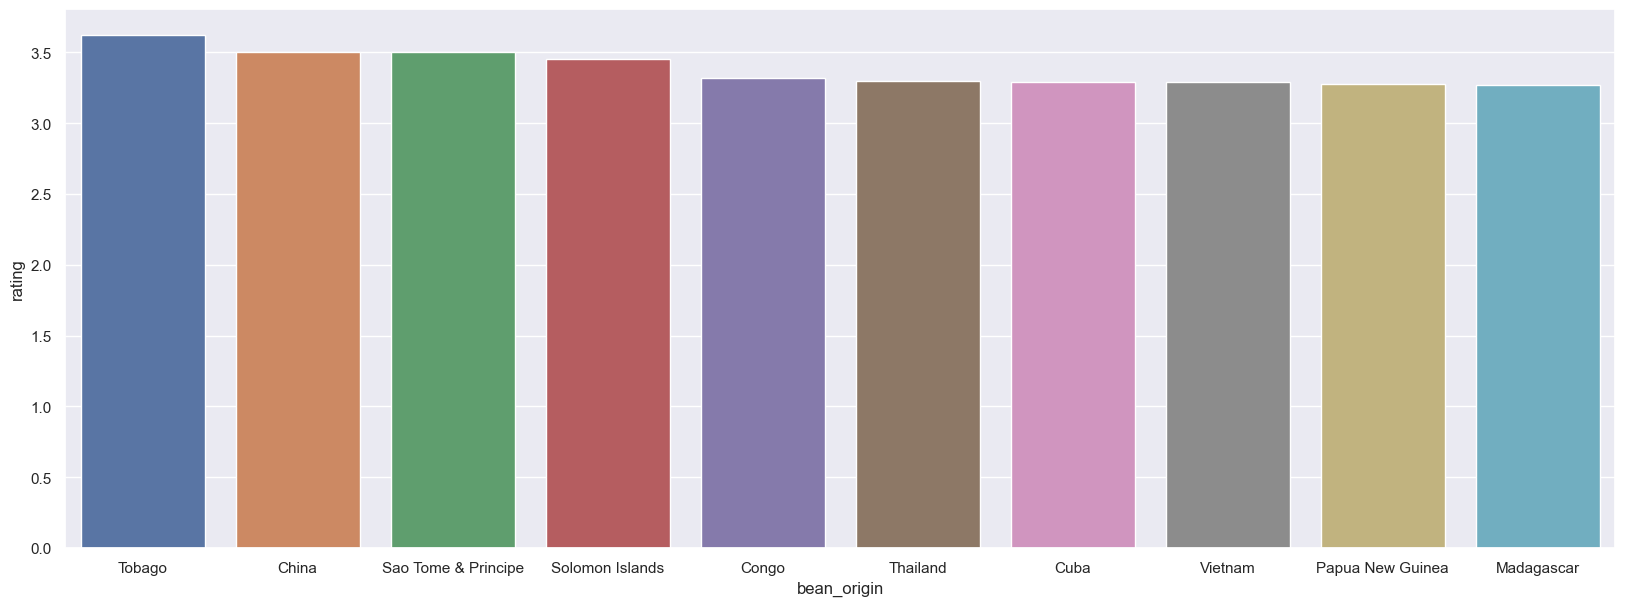

In [9]:
sns.set(rc = {'figure.figsize':(20,7)})
sns.barplot(x='bean_origin',y='rating',data=choc_ratings[0:10])

## Question 1 Observation
    Tobago has the highest rating
    Puerto Rico has the lowest rating

In [10]:
bars_reviewed = chocolate_bars.groupby('bean_origin')[['bar_name']].count().reset_index().sort_values(by = 'bar_name',ascending = False)
bars_reviewed

,bean_origin,bar_name
60,Venezuela,253
36,Peru,244
13,Dominican Republic,226
14,Ecuador,219
28,Madagascar,177
...,...,...
50,Suriname,1
49,Sumatra,1
48,Sulawesi,1
47,St.Vincent-Grenadines,1


## Question 2 Observation
    Venezuela has the highest bar reviewed per country 
    

<Axes: xlabel='bean_origin', ylabel='bar_name'>

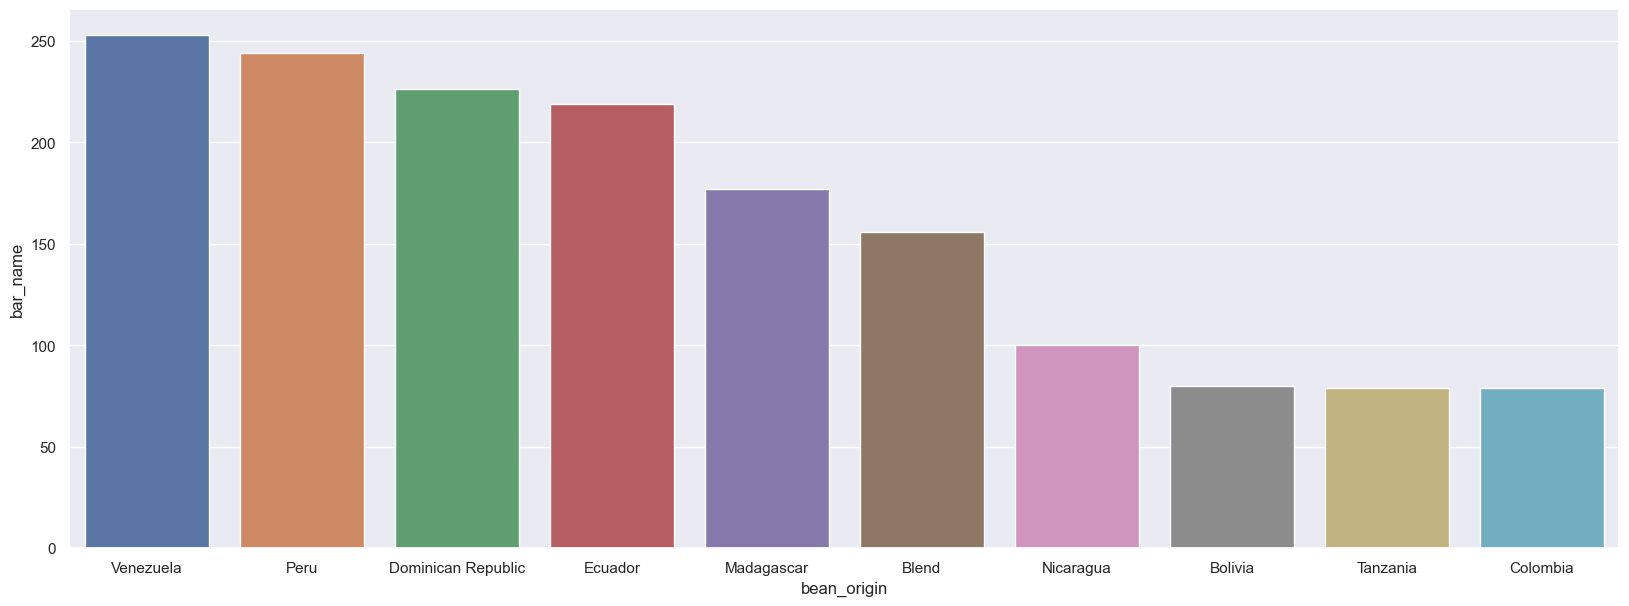

In [11]:
sns.barplot(x='bean_origin',y='bar_name',data= bars_reviewed[0:10])

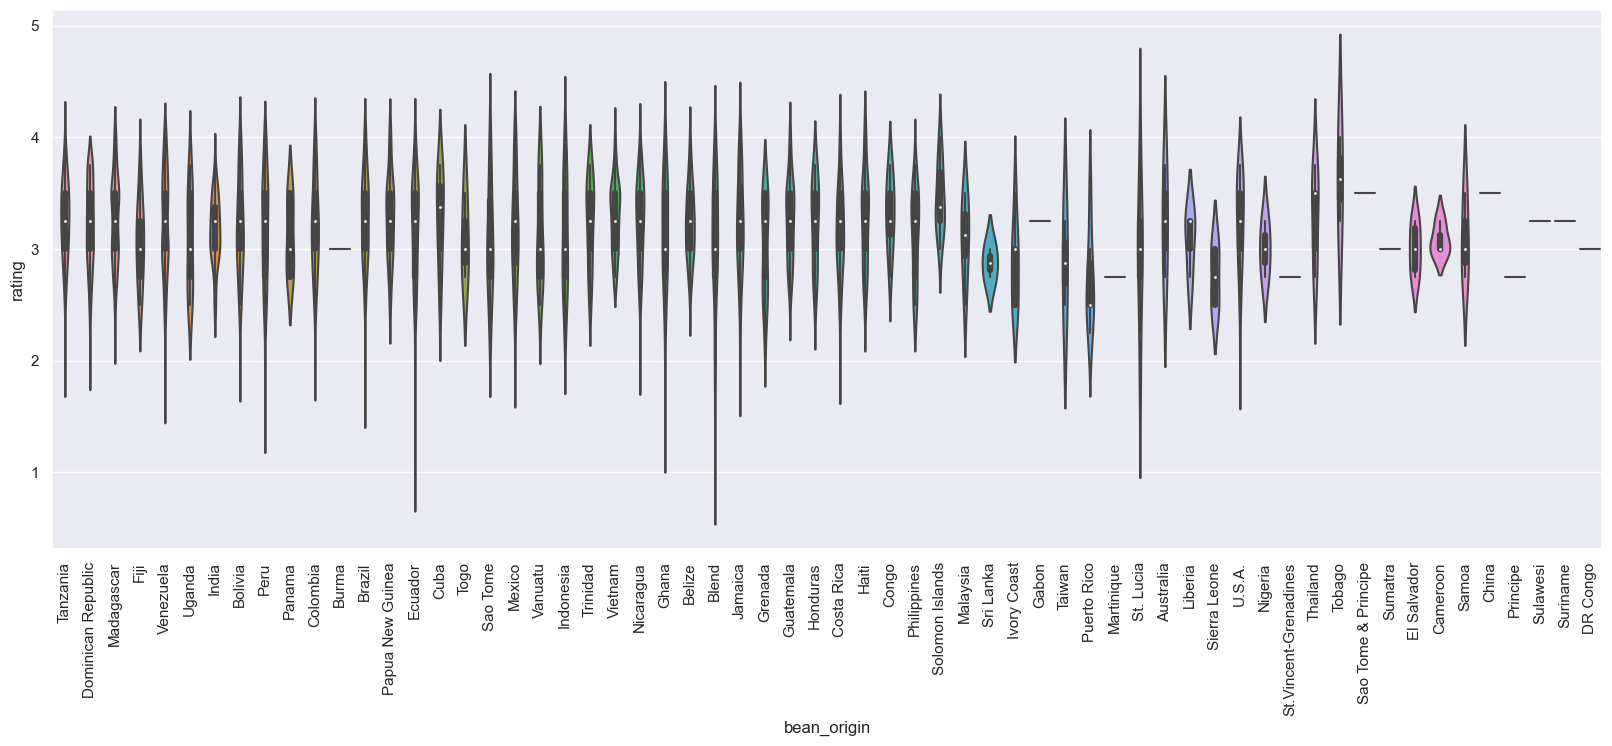

In [15]:
sns.violinplot(y="rating",x="bean_origin",data=chocolate_bars)
plt.xticks(rotation=90)
plt.show()

## observation
    cocoa bean origin is not an indicator of quality

## average cocoa content for bars greater than 3.5

In [19]:
chocolate_bars[chocolate_bars['rating']>=3.5].cocoa_percent.mean()

71.10849539406345

## Findings
    There are more chocolate bars with rating greater than 3.
    Most of the cholocolate bars have 3 ingredients.
    The maximum number of ingredient in a bar is 6
    Average rating of the chocolate bar is highest for the country Tobago
    Average rating of the chocolate bar is lowest for the country Puerto Rico
    Highest numbers of bars were reviewed for the country Venezulea
    Cocoa bean's origin is not an indicator of quality